In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf  
import numpy as np
import cv2
import os

In [23]:
img = image.load_img(r"C:\Users\karan\Python ML\Face Rating ML\basedata\train\5 train\hyunjin.jpg")

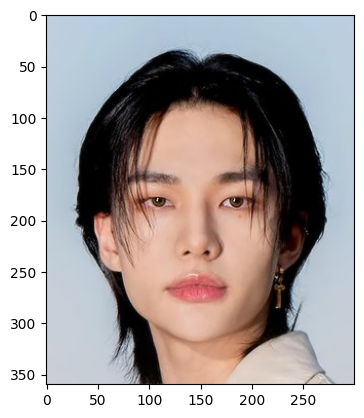

In [24]:
plt.imshow(img)

In [25]:
cv2.imread(r"C:\Users\karan\Python ML\Face Rating ML\basedata\train\5 train\hyunjin.jpg").shape #image is 360 height, 300 width, and 3 rgb colours)

(360, 300, 3)

In [26]:
cv2.imread(r"C:\Users\karan\Python ML\Face Rating ML\basedata\train\5 train\hyunjin.jpg")

array([[[222, 208, 189],
        [222, 208, 189],
        [222, 208, 189],
        ...,
        [224, 207, 188],
        [224, 207, 188],
        [224, 207, 188]],

       [[222, 208, 189],
        [222, 208, 189],
        [222, 208, 189],
        ...,
        [224, 207, 188],
        [224, 207, 188],
        [224, 207, 188]],

       [[222, 208, 189],
        [222, 208, 189],
        [222, 208, 189],
        ...,
        [224, 207, 188],
        [224, 207, 188],
        [224, 207, 188]],

       ...,

       [[214, 207, 204],
        [214, 207, 204],
        [213, 206, 203],
        ...,
        [211, 204, 201],
        [211, 204, 201],
        [211, 204, 201]],

       [[214, 207, 204],
        [214, 207, 204],
        [213, 206, 203],
        ...,
        [211, 204, 201],
        [211, 204, 201],
        [211, 204, 201]],

       [[214, 207, 204],
        [214, 207, 204],
        [213, 206, 203],
        ...,
        [211, 204, 201],
        [211, 204, 201],
        [211, 204, 201]]

In [27]:
train = ImageDataGenerator(rescale=1/224)
validation = ImageDataGenerator(rescale=1/224)

In [28]:
#Input layer

train_dataset = train.flow_from_directory(r"C:\Users\karan\Python ML\Face Rating ML\basedata\train",
                                         target_size = (400, 250),
                                          batch_size = 16,
                                          class_mode = 'categorical'
                                         )

validation_dataset = train.flow_from_directory(r"C:\Users\karan\Python ML\Face Rating ML\basedata\val",
                                         target_size = (400, 250),
                                          batch_size = 16,
                                          class_mode = 'categorical'
                                         )

Found 200 images belonging to 5 classes.
Found 40 images belonging to 5 classes.


In [29]:
validation_dataset.class_indices

{'1 val': 0, '2 val': 1, '3 val': 2, '4 val': 3, '5 val': 4}

In [30]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4])

In [31]:
# Hidden layers            
                                    #layer 1
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(400,250,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #layer 2
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(400,250,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #layer 3
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(400,250,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #flatten
                                    tf.keras.layers.Flatten(),
                                    #dense layer 1
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    #dense layer 2
                                    tf.keras.layers.Dense(5, activation='softmax')
                                   ])

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer= RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=5,
                      epochs=50,
                      validation_data=validation_dataset)

Epoch 1/50
5/5 [==============================] - 11s 2s/step - loss: 14.2575 - accuracy: 0.1806 - val_loss: 1.7417 - val_accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 4s 703ms/step - loss: 1.7154 - accuracy: 0.1625 - val_loss: 1.6924 - val_accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 3s 652ms/step - loss: 1.6424 - accuracy: 0.2639 - val_loss: 1.5926 - val_accuracy: 0.2250
Epoch 4/50
5/5 [==============================] - 3s 619ms/step - loss: 1.5061 - accuracy: 0.3194 - val_loss: 1.5287 - val_accuracy: 0.3750
Epoch 5/50
5/5 [==============================] - 3s 613ms/step - loss: 1.5651 - accuracy: 0.2250 - val_loss: 1.5982 - val_accuracy: 0.3250
Epoch 6/50
5/5 [==============================] - 3s 603ms/step - loss: 1.4380 - accuracy: 0.3333 - val_loss: 1.5227 - val_accuracy: 0.3250
Epoch 7/50
5/5 [==============================] - 3s 606ms/step - loss: 1.4708 - accuracy: 0.4750 - val_loss: 1.5808 - val_accuracy: 0.2250
Epoch 8/50
5/5 [=====

In [ ]:
dir_path = r"C:\Users\karan\Python ML\Face Rating ML\basedata\test"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(400,250))
    img_for_vis = image.load_img(os.path.join(dir_path, i)) #loading image in its original size for visual purposes
    plt.imshow(img_for_vis)
    plt.show()

X = image.img_to_array(img)
X = np.expand_dims(X,axis=0)
images = np.vstack([X])
val = model.predict(images)

print(val) #Out put is given in an array where the position of 1 determines your rating

#Find the position of the 1 by dinsing the max value in array
index = np.argmax(val)

if index == 0:
    print("You are a 1/5")
elif index == 1:
    print("You are a 2/5")
elif index == 2:
    print("You are a 3/5")
elif index == 3:
    print("You are a 4/5")
elif index == 4:
    print("You are a 5/5")
    